Yehezkiel Chandra Putra Cahyono - 0706022310038

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [136]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Tidak ada data kosong semua full

In [138]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Tidak ada data yang aneh jadi lanjut saja

In [139]:
df = df.rename(columns={"Annual Income (k$)": "Income"})
df.head()
# rename the Income(K$)	column biar gampang ngetik

,CustomerID,Gender,Age,Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


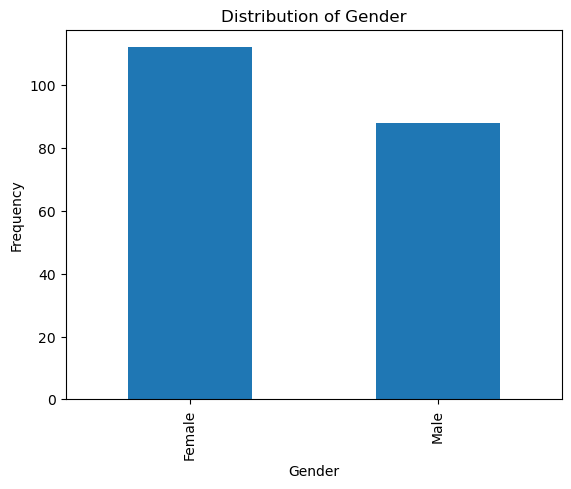

In [140]:
# Menghitung frekuensi setiap nilai pada kolom 'Age'
age_counts = df['Gender'].value_counts()

# Membuat bar chart
age_counts.plot(kind='bar')

# Menambahkan judul dan label
plt.title('Distribution of Gender')
plt.ylabel('Frequency')

# Menampilkan chart
plt.show()

Lebih banyak Cewek dari cowok, jadi mungkin untuk insight kedepannya bisa mengutamakan cewek

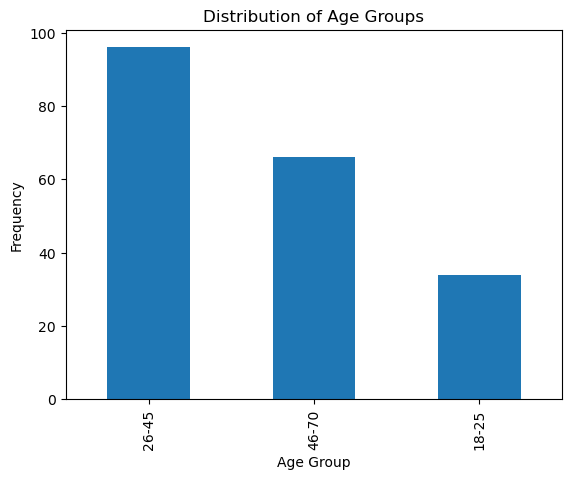

In [141]:
# Mendefinisikan rentang usia
bins = [18, 25, 45, 70]
labels = ['18-25', '26-45', '46-70']

# Membuat kolom baru 'Age Group' berdasarkan rentang usia
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Menghitung jumlah data per kelompok usia
age_group_counts = df['Age Group'].value_counts()

# Membuat bar chart
age_group_counts.plot(kind='bar')

# Menambahkan judul dan label
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Frequency')

# Menampilkan chart
plt.show()


Manusia Terbanyak berumuh 26 - 45, saya mengkategorikan seperti ini karena sesuai pembagian umur yang saya tahu

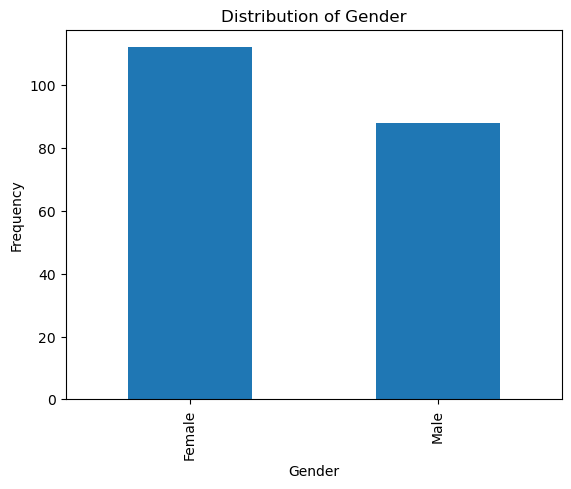

In [142]:
# Menghitung frekuensi setiap nilai pada kolom 'Age'
age_counts = df['Gender'].value_counts()

# Membuat bar chart
age_counts.plot(kind='bar')

# Menambahkan judul dan label
plt.title('Distribution of Gender')
plt.ylabel('Frequency')

# Menampilkan chart
plt.show()

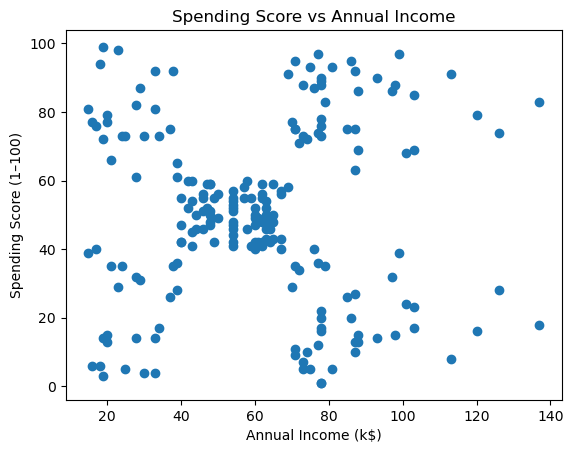

Koefisien Korelasi antara Spending Score dan Annual Income: 0.009902848094037612


In [143]:
# Pastikan kolom yang digunakan ada di data
# Misalnya, kolom 'Spending Score (1–100)' dan 'Annual Income (k$)'
spending_score = df['Spending Score (1-100)']
annual_income = df['Income']

# Membuat scatter plot
plt.scatter(annual_income, spending_score)

# Menambahkan judul dan label
plt.title('Spending Score vs Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')

# Menampilkan plot
plt.show()

correlation = spending_score.corr(annual_income)

# Menampilkan korelasi
print(f'Koefisien Korelasi antara Spending Score dan Annual Income: {correlation}')

Tidak ada corelasi dari Pendapatan tahunan dengan spending scorenya

# Data Transformation

In [144]:
df= df.copy()

df = df.drop(['CustomerID', 'Age Group'], axis=1)

one_hot_map = {
    'Gender': {'Female': 0, 'Male': 1},
}

for col, mapping in one_hot_map.items():
    df[col] = df[col].map(mapping)

df.head()


,Gender,Age,Income,Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Income                  200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


   Gender   Age  Income  Spending Score (1-100)
0     1.0  0.19   0.015                    0.39
1     1.0  0.21   0.015                    0.81
2     0.0  0.20   0.016                    0.06
3     0.0  0.23   0.016                    0.77
4     0.0  0.31   0.017                    0.40


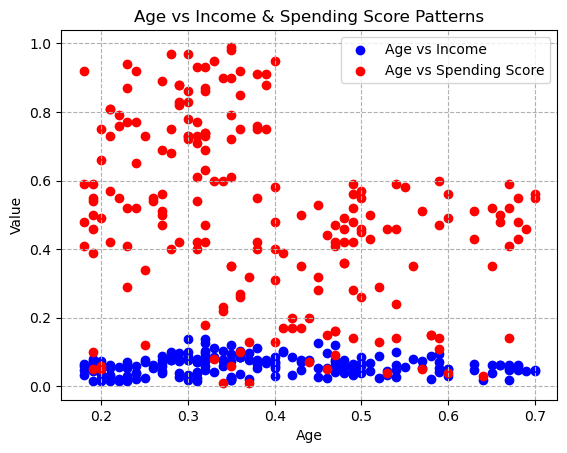

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi untuk normalisasi menggunakan decimal scaling
def decimal_scaling(df):
    normalized_df = df.copy()
    for column in df.columns:
        j = 0
        max_value = df[column].max()
        while max_value > 1:
            max_value /= 10
            j += 1
        normalized_df[column] = df[column] / (10 ** j)
    return normalized_df

# Misalnya, df sudah memiliki kolom 'Age', 'Income', dan 'Spending Score (1-100)'
df_decimal_scaled = decimal_scaling(df)

# Melihat data setelah di-scaling
print(df_decimal_scaled.head())

# Visualisasi
plt.scatter(df_decimal_scaled["Age"], df_decimal_scaled["Income"], label="Age vs Income", color='blue')
plt.scatter(df_decimal_scaled["Age"], df_decimal_scaled["Spending Score (1-100)"], label="Age vs Spending Score", color='red')
plt.xlabel("Age")
plt.ylabel("Value")
plt.grid(axis='both', linestyle='--')
plt.title("Age vs Income & Spending Score Patterns")
plt.legend()  # Menampilkan legend untuk membedakan warna
plt.show()


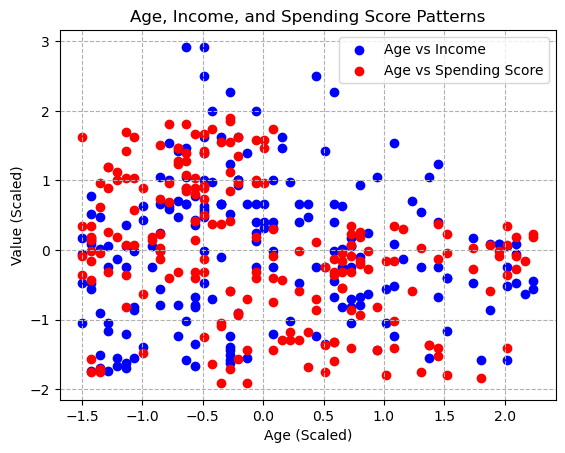

In [154]:
# Inisialisasi StandardScaler
sc = StandardScaler()

# Melakukan scaling pada kolom yang diinginkan
df_sc_scaled = pd.DataFrame(sc.fit_transform(df[['Age', 'Income', 'Spending Score (1-100)']]), 
                            columns=["Age", "Income", "Spending Score (1-100)"])

# Melihat data setelah di-scaling
df_sc_scaled.head()

# Visualisasi scatter plot untuk Age vs Income dan Age vs Spending Score
plt.scatter(df_sc_scaled["Age"], df_sc_scaled["Income"], label="Age vs Income", color='blue')
plt.scatter(df_sc_scaled["Age"], df_sc_scaled["Spending Score (1-100)"], label="Age vs Spending Score", color='red')

# Menambahkan label dan grid
plt.xlabel("Age (Scaled)")
plt.ylabel("Value (Scaled)")
plt.grid(axis='both', linestyle='--')

# Menambahkan judul dan legenda
plt.title("Age, Income, and Spending Score Patterns")
plt.legend()

# Menampilkan plot
plt.show()

Scaling dibutuhkan supaya K-Means Clustering mengambil value yang terdekat dengan dirinya

#  Choosing K

d:\Learning Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Learning Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Learning Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Learning Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

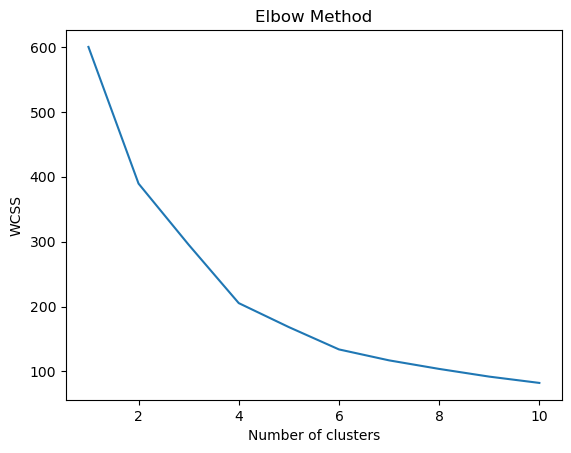

In [156]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [158]:
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

print(wcss_table)

   Number of Clusters        WCSS
0                   1  600.000000
1                   2  389.386189
2                   3  295.212246
3                   4  205.225147
4                   5  168.247580
5                   6  133.868334
6                   7  117.011555
7                   8  103.828578
8                   9   91.956839
9                  10   82.245745


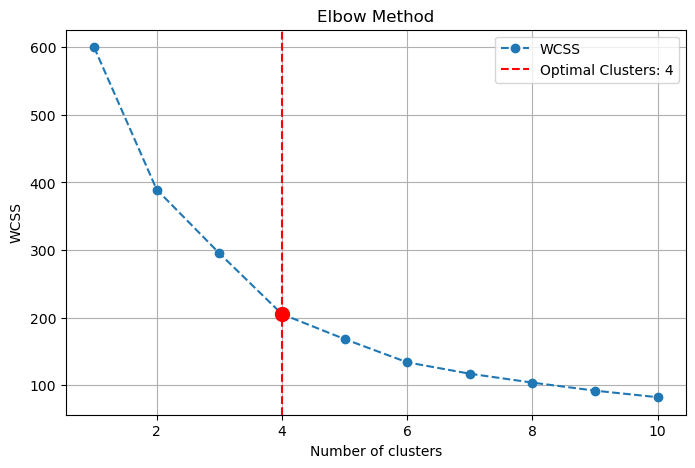

The optimal number of clusters is: 4


In [159]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

K yang di pakai K4 karena menurut phyton nya k4 jadi elbow, selain itu penurunan K4 ke K5 tidak signifikan jadi wajar K4 yang dipilih

In [160]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

d:\Learning Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Gender,Age,Income,Spending Score (1-100),KMeans_Cluster
0,1,19,15,39,3
1,1,21,15,81,2
2,0,20,16,6,3
3,0,23,16,77,2
4,0,31,17,40,3


C:\Users\Ivana Caroline\AppData\Local\Temp\ipykernel_12696\2822971347.py:6: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x="Age", y="Income", hue=clusters, size="Spending Score (1-100)",


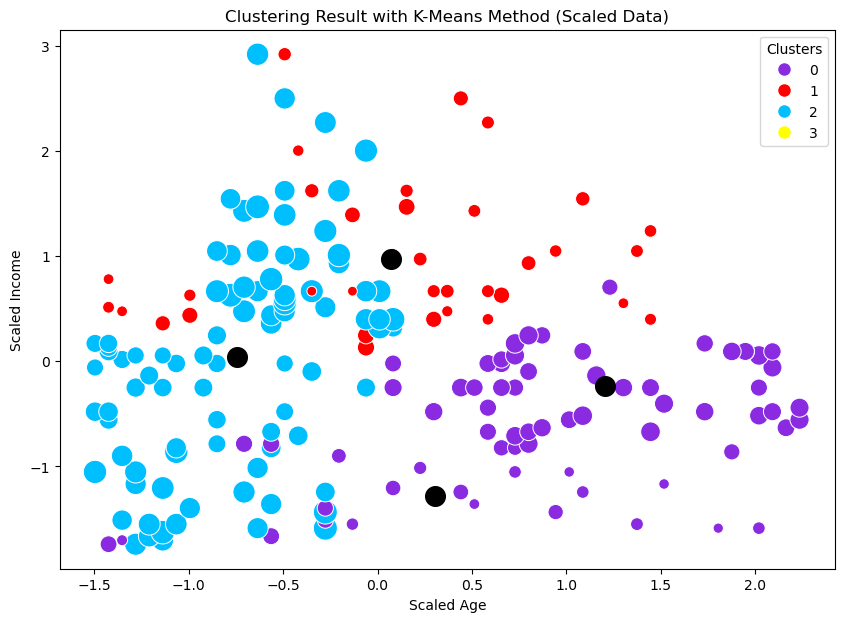

In [177]:
from matplotlib.lines import Line2D

plt.figure(figsize=(10,7))

# Gunakan Spending Score (1-100) untuk ukuran titik pada scatter plot
sns.scatterplot(x="Age", y="Income", hue=clusters, size="Spending Score (1-100)", 
                palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, 
                sizes=(50, 300), legend=False, marker="o", s=60)

# Menambahkan centroid pada plot
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")

# Membuat kustom legend hanya untuk warna yang diinginkan
custom_legend = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blueviolet', markersize=10, label='0'),
                 Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='1'),
                 Line2D([0], [0], marker='o', color='w', markerfacecolor='deepskyblue', markersize=10, label='2'),
                 Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='3')]

# Menambahkan custom legend ke plot
plt.legend(handles=custom_legend, title='Clusters')

# Menambahkan label dan judul
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")

# Menampilkan plot
plt.show()

# Menampilkan plot
plt.show()

In [178]:
cluster_summary = df.groupby(clusters).agg({'Age': ['mean', 'min', 'max'],
                                              'Income': ['mean', 'min', 'max'],
                                              'Spending Score (1-100)': ['mean', 'min', 'max'],})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Age             Income          Spending Score (1-100)  \
                     mean min max       mean min  max                   mean   
KMeans_cluster                                                                 
0               55.638298  40  70  54.382979  38   79              48.851064   
1               39.871795  19  59  86.102564  64  137              19.358974   
2               28.500000  18  40  61.677778  15  137              71.766667   
3               43.125000  19  67  26.958333  15   40              22.083333   

                        
               min max  
KMeans_cluster          
0               35  60  
1                1  42  
2               41  99  
3                3  42

Cluster 0: Individu dengan usia yang lebih tua, pendapatan menengah, dan pengeluaran sedang.(Bisa beri promo karena orang berpendapatan menengah biasanya suka barang promo)

Cluster 1: Individu muda, dengan pendapatan tinggi namun pengeluaran rendah. (Mungkin bisa melakukan Promosi pada mereka tentang brand brand yang memang terjamin kualitasnya)

Cluster 2: Individu muda, dengan pendapatan relatif tinggi dan pengeluaran yang lebih besar.(Bisa sering sering promosi ke mereka karena mereka orang paling banyak berbelanja)

Cluster 3: Individu dengan usia sedang, pendapatan rendah, dan pengeluaran rendah. (Jual barang murah pada mereka)
